<a href="https://colab.research.google.com/github/surendraghub/AI-ML-Project-/blob/main/Text_To_Image_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade jax jaxlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 MB 8.8 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.33
    Uninstalling jaxlib-0.4.33:
      Successfully uninstalled jaxlib-0.4.33
  Attempting uninstall: jax
    Found existing installation: jax 0.4.33
    Uninstalling jax-0.4.33:
      Successfully uninstalled jax-0.4.33


In [ ]:
!pip install diffusers transformers accelerate

In [ ]:
import torch
print("GPU available:", torch.cuda.is_available())

GPU available: True


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

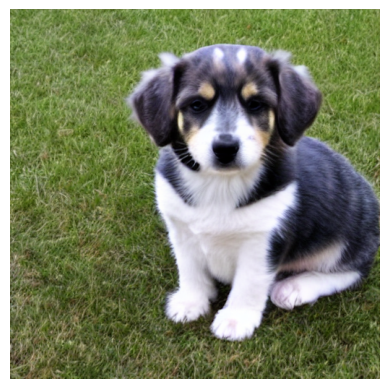

In [ ]:
# Install necessary libraries

# Import libraries
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import matplotlib.pyplot as plt

# Check if GPU is available
if not torch.cuda.is_available():
    raise RuntimeError(
        "GPU not available. Please ensure that you are using a GPU runtime.")

# Load the Stable Diffusion model
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4",
                                               torch_dtype=torch.float16)
pipe = pipe.to("cuda")  # Move the model to GPU


# Function to generate an image based on a prompt
def generate_image(prompt):
    with torch.no_grad():
        image = pipe(prompt).images[0]
    return image


# Example usage
prompt = "Dog"
generated_image = generate_image(prompt)

# Display the generated image
plt.imshow(generated_image)
plt.axis("off")
plt.show()

In [ ]:
import pickle
from IPython.display import display, Javascript
from google.colab import files

# Assuming 'pipe' is your loaded StableDiffusionPipeline instance

# Create a dictionary to store the weights of the model components
model_weights = {
    "unet": pipe.unet.state_dict(),
    "vae": pipe.vae.state_dict(),
    "text_encoder": pipe.text_encoder.state_dict(),
}

# Pickle the model weights dictionary
with open("Text_To_Image_gen.pkl", "wb") as f:
    pickle.dump(model_weights, f)

# Download the pickled file
files.download("Text_To_Image_gen.pkl")

print(
    "Model weights saved and downloaded as 'Text_To_Image_gen.pkl'. Please keep this file safe."
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model weights saved and downloaded as 'stable_diffusion_weights.pkl'. Please keep this file safe.
